In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

data = pd.concat([X, y], axis=1)



Data Shape: (48842, 15)

Missing Values:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


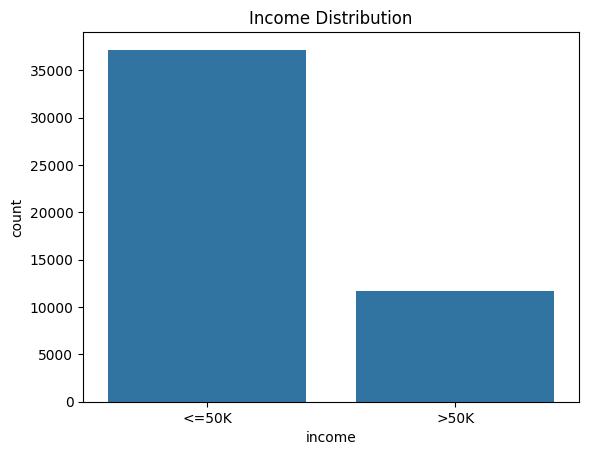

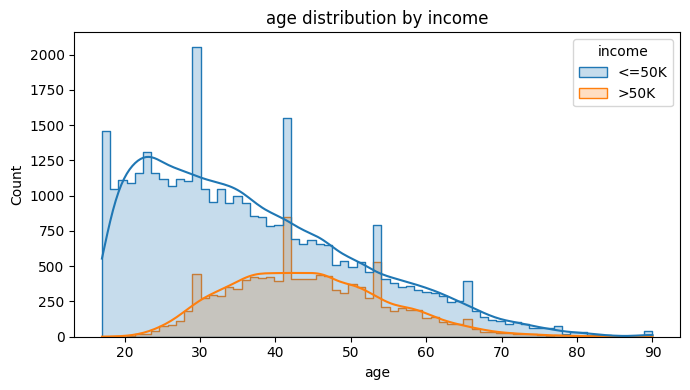

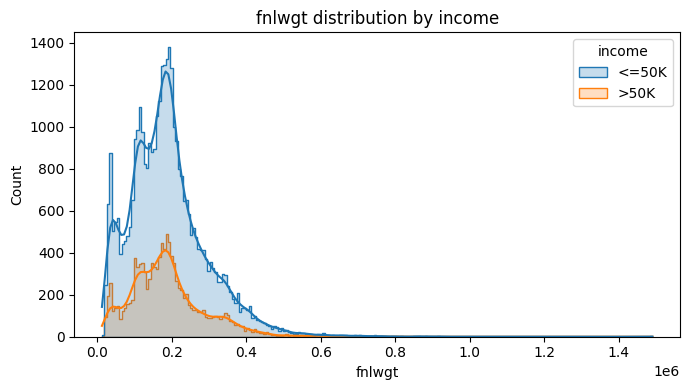

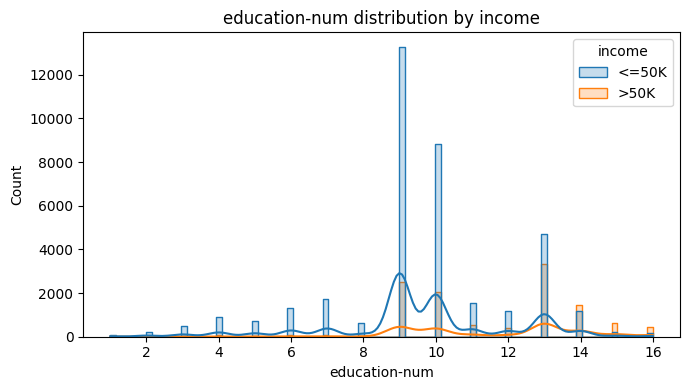

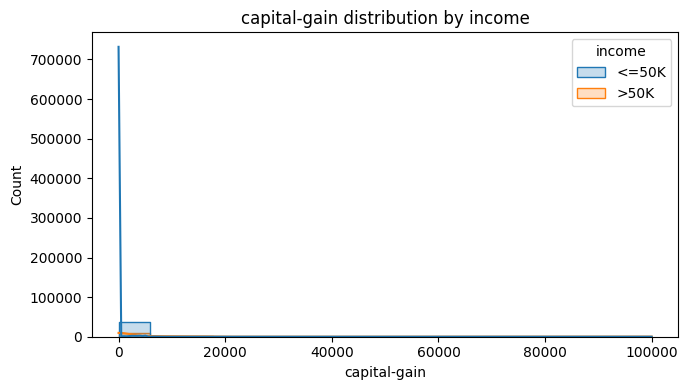

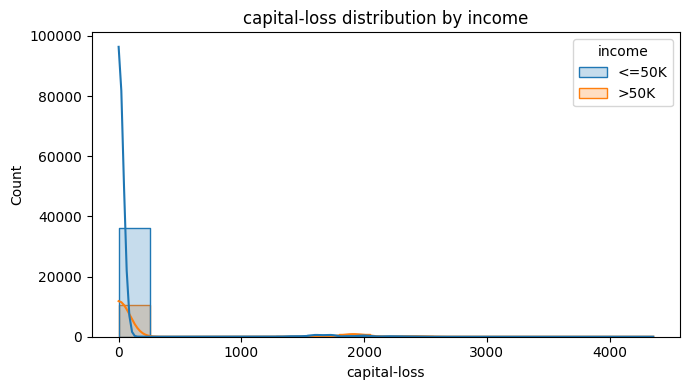

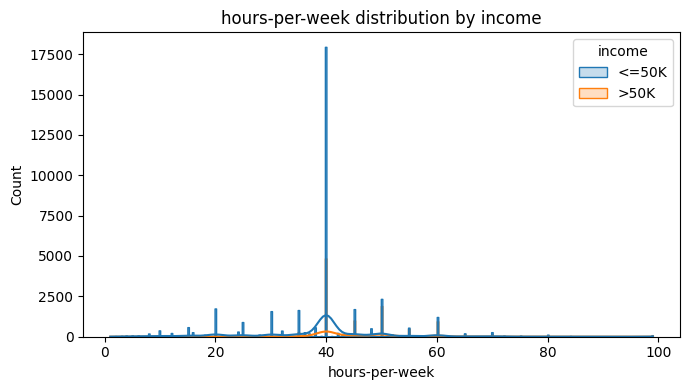

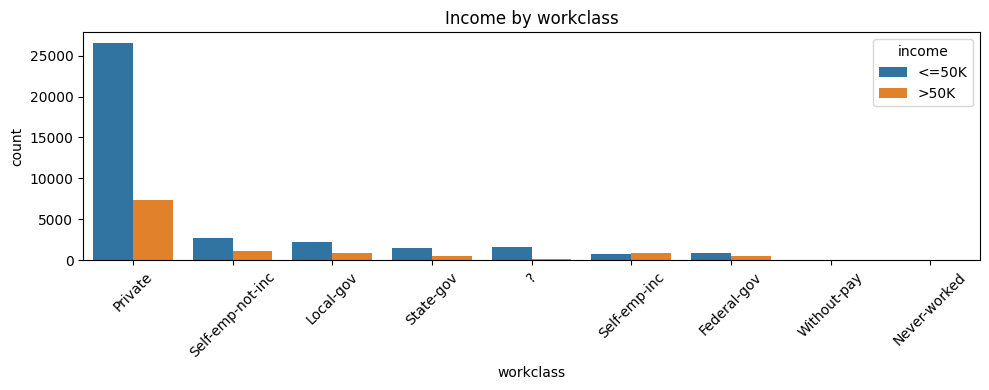

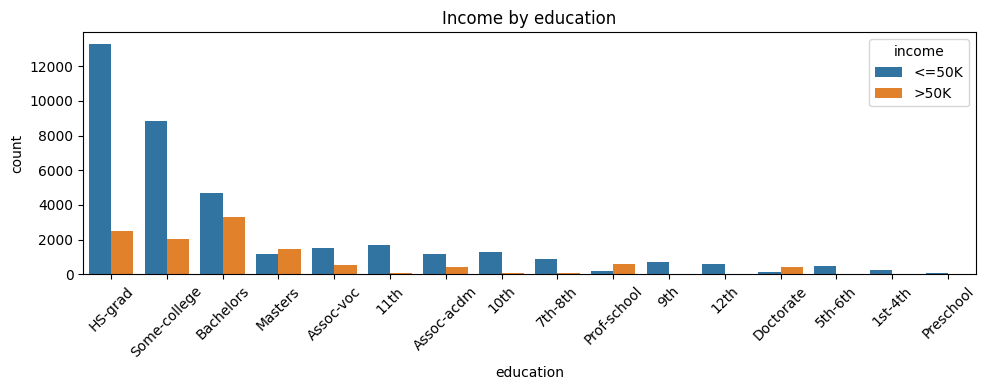

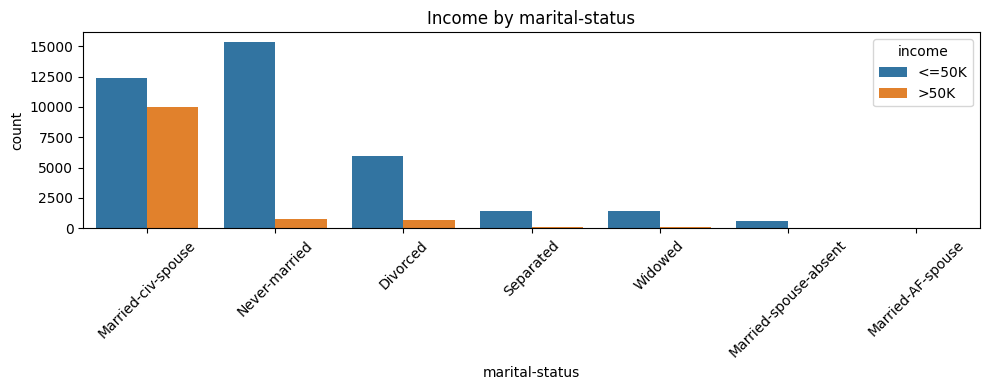

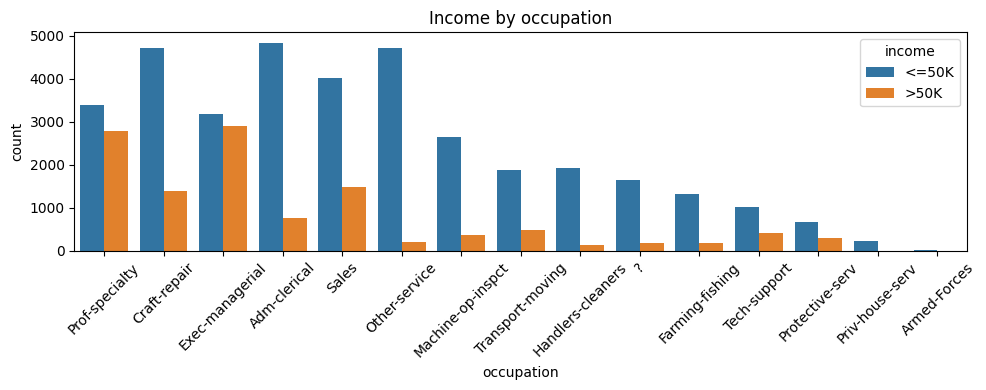

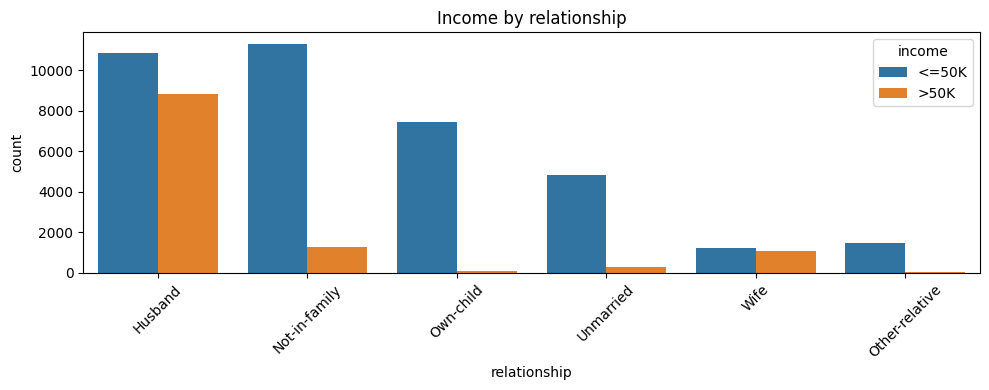

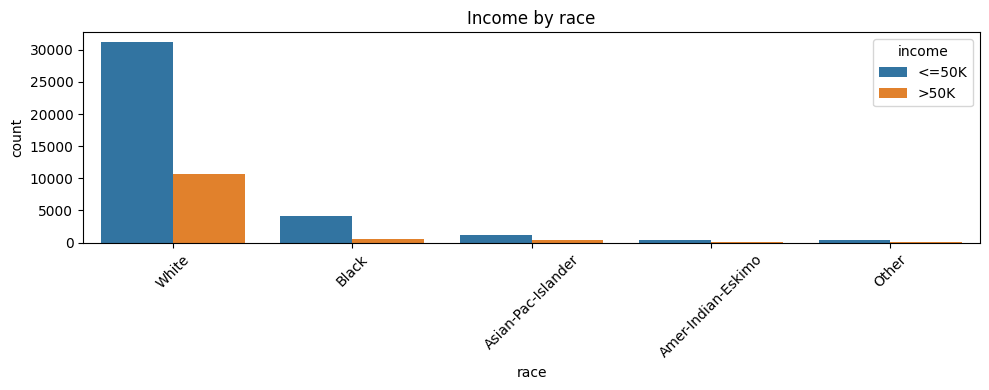

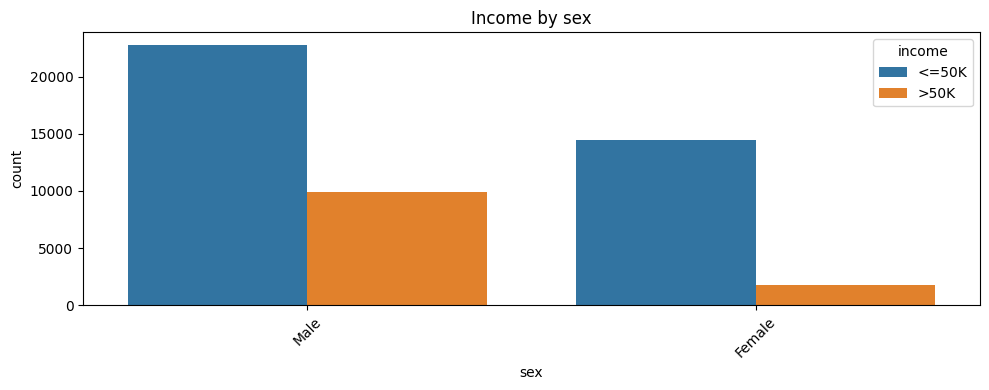

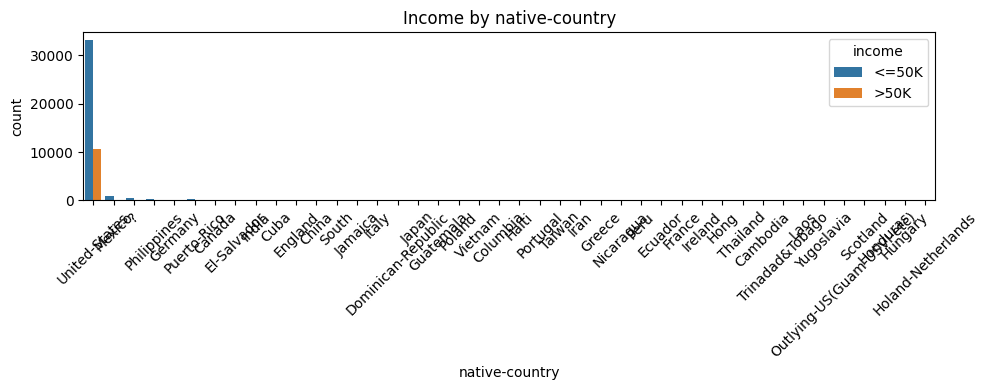

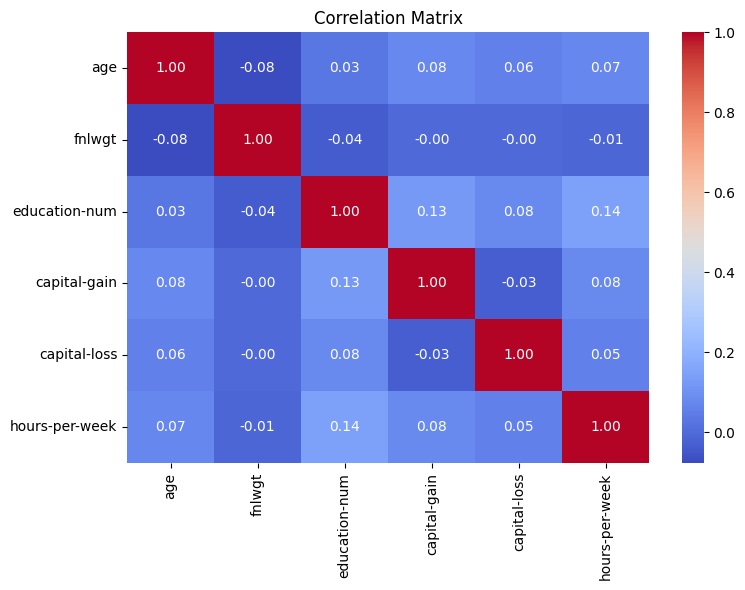


Average values by income class:

income                  <=50K           >50K
age                 36.872184      44.275178
fnlwgt          190039.565523  188470.574570
education-num        9.598493      11.602807
capital-gain       147.010308    4042.239497
capital-loss        54.151931     193.528964
hours-per-week      38.840048      45.452896


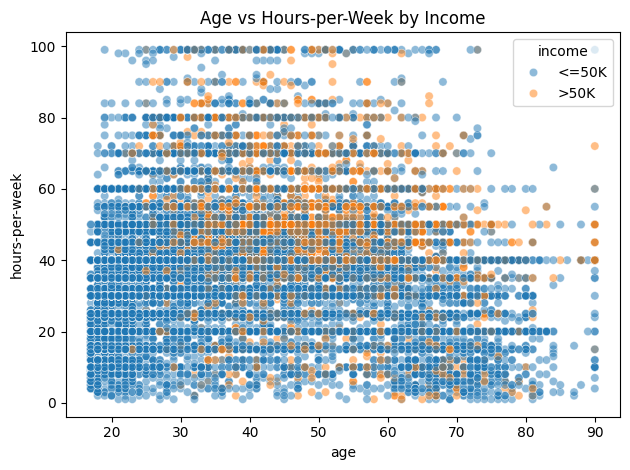

In [9]:
# 1. Overview
print("Data Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)

# 2. Target Distribution
sns.countplot(data=data, x='income')
plt.title("Income Distribution")
plt.show()

# 3. Numerical Features Distribution by Income Group
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=col, hue='income', kde=True, element='step')
    plt.title(f"{col} distribution by income")
    plt.tight_layout()
    plt.show()

# 4. Categorical Features vs Income
cat_cols = data.select_dtypes(include='object').drop(columns=['income']).columns

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, hue='income', order=data[col].value_counts().index)
    plt.title(f"Income by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Correlation Heatmap (numerical features)
plt.figure(figsize=(8,6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 6. Grouped Means by Income
print("\nAverage values by income class:\n")
print(data.groupby("income")[numeric_cols].mean().T)

# Optional: Look at age vs hours-per-week by income
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='income', alpha=0.5)
plt.title("Age vs Hours-per-Week by Income")
plt.tight_layout()
plt.show()